In [20]:
import tifffile as tiff
import numpy as np
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
in_file = "data/test1.tif"

In [3]:
with tiff.TiffFile(in_file) as tif:
    images = tif.asarray()
    metadata = tif[0].tags

In [4]:
images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

In [5]:
df = pd.DataFrame({"chan1":images[0].flatten(), "chan2":images[1].flatten()}, )

In [6]:
df[df == 0] = np.nan

In [7]:
df = df - 10000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110029160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1101d6c18>]], dtype=object)

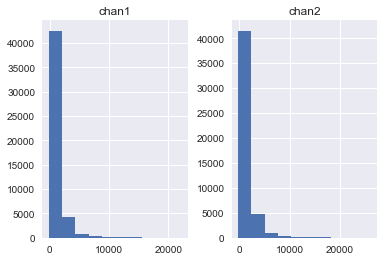

In [8]:
df.hist()

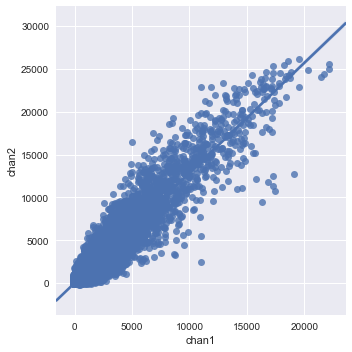

In [9]:
sns.lmplot(x = 'chan1', y = 'chan2', data = df)

In [42]:
df.corr()

,chan1,chan2
chan1,1.000000,0.941555
chan2,0.941555,1.000000


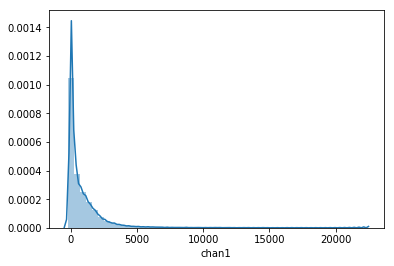

In [44]:
sns.distplot(df["chan1"].dropna(), )

In [30]:
lm = LinearRegression()

In [37]:
lm.fit(X = df["chan1"].dropna().values.reshape(-1, 1), y = df["chan2"].dropna().values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
y_pred = lm.predict(df["chan1"].dropna().reshape(-1, 1))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [34]:
from sklearn.metrics import r2_score


In [36]:
r2 = r2_score(df["chan2"].dropna().reshape(-1, 1), y_pred)
r2

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


0.88652529532045099

In [40]:
df_norm = pd.DataFrame()
df_norm["chan1"] = df["chan1"] / np.mean(df["chan1"]) 

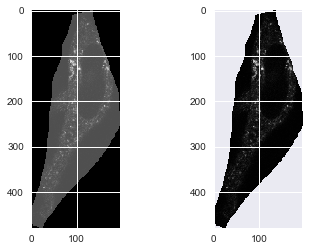

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(images[0], cmap = plt.cm.gray)
ax2.imshow(df_norm["chan1"].values.reshape(479, 195), cmap = plt.cm.gray)




In [48]:
images[0].shape

(479, 195)

In [99]:
df_norm = df.apply(lambda x: x / x.max(), axis = 0)

In [100]:
df_norm["chan2"].max()

1.0

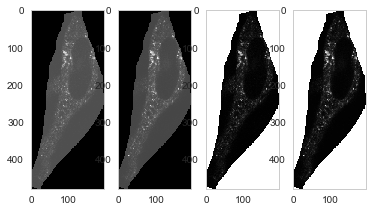

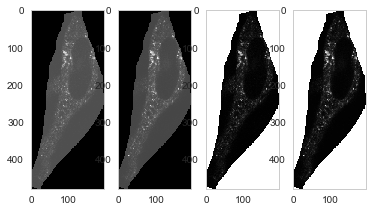

In [88]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4)
ax1.imshow(images[0], cmap = plt.cm.gray)
ax2.imshow(images[1], cmap = plt.cm.gray)
ax3.imshow(df_norm["chan1"].values.reshape(479,195), cmap = plt.cm.gray)
ax4.imshow(df_norm["chan2"].values.reshape(479,195), cmap = plt.cm.gray)
fig

In [91]:
lm2 = LinearRegression()
lm2.fit(X = df_norm["chan1"].dropna().values.reshape(-1, 1), y = df_norm["chan2"].dropna().values.reshape(-1, 1))
y_pred2 = lm2.predict(df_norm["chan1"].dropna().values.reshape(-1, 1))
#r2_score(df_norm["chan2"].dropna().reshape(-1, 1), y_pred2)

In [92]:
r2_score(df_norm["chan2"].dropna().values.reshape(-1, 1), y_pred2)

0.88652529532045099

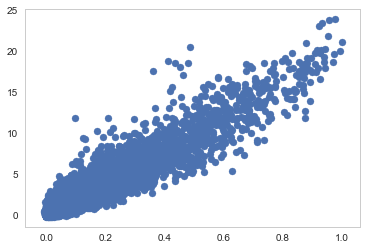

In [103]:
plt.scatter(df_norm["chan2"].dropna(), y_pred2)

In [90]:
df_norm.dropna().corr()

,chan1,chan2
chan1,1.000000,0.941555
chan2,0.941555,1.000000


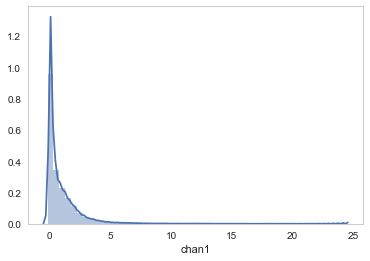

In [97]:
sns.distplot(df_norm["chan1"].dropna())


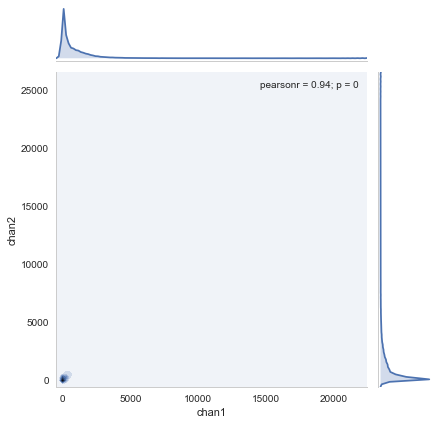

In [102]:
sns.jointplot(x = "chan1", y = "chan2", data = df, kind = "kde")

In [107]:
df_filter = np.nan(df[df < (0.1 * df.max())])

TypeError: 'float' object is not callable

In [108]:
df_filter = df.copy()

In [112]:
df_filter = df_filter.clip(lower = (0.1 * df.max()), axis = 0)

/anaconda/lib/python3.6/site-packages/pandas/core/ops.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  result = op(x, y)
/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py:2984: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [114]:
df_filter.min()

chan1   NaN
chan2   NaN
dtype: float64